In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
%matplotlib inline

In [2]:
#Lendo a base de dados
df = pd.read_json("receitas.json")

In [3]:
#Verificando o shape
df.shape

(20130, 11)

In [4]:
#Exibindo as 5 primeiras linhas
df.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [5]:
#Verificando os tipos de dados de cada coluna
df.dtypes

directions                  object
fat                        float64
date           datetime64[ns, UTC]
categories                  object
calories                   float64
desc                        object
protein                    float64
rating                     float64
title                       object
ingredients                 object
sodium                     float64
dtype: object

In [6]:
#Removendo espaços finais
for col in df.select_dtypes("object").columns:
    df[col] = df[col].apply(lambda x: x.strip() if type(x) == str else x)

In [7]:
#Ordenando o dataset pela coluna calorias
df.sort_values(by='calories', ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0
19749,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0
1308,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0
...,...,...,...,...,...,...,...,...,...,...,...
20090,[In a large saucepan of boiling salted water c...,NaN,2004-08-20 04:00:00+00:00,"[Pasta, Sauté, Quick & Easy, Parmesan, Sausage...",NaN,Can be prepared in 45 minutes or less.,NaN,3.750,Pepperoni Spaghetti Cakes,"[1/4 pound spaghetti, 1/3 cup finely chopped s...",NaN
20094,[Swirl poire Williams in 2 glasses to coat; di...,NaN,2007-07-26 17:34:23+00:00,"[Fruit Juice, Liqueur, Alcoholic, Ginger, Bran...",NaN,Serve additional pear crisps as snacks.,NaN,3.125,Autumn Pear Chip,"[Poire Williams (clear pear brandy), 6 quarter...",NaN
20104,[Heat 1 tablespoon oil in a large heavy pot ov...,NaN,2012-09-18 04:00:00+00:00,"[Egg, Leafy Green, Vegetable, Brunch, Vegetari...",NaN,We love the frilly edges of olive oil-fried eg...,NaN,5.000,Spinach with Chickpeas and Fried Eggs,"[3 tablespoons olive oil, divided, plus more, ...",NaN
20113,[Preheat oven to 400°F. Spray 2 large baking s...,NaN,2004-08-20 04:00:00+00:00,"[Sandwich, Herb, Vegetable, Roast, Picnic, Veg...",NaN,None,NaN,3.750,Herbed Goat Cheese and Roasted-Vegetable Sandw...,"[Nonstick vegetable oil spray, 2 medium zucchi...",NaN


### Com o resultado acima é possível perceber que existem receitas duplicadas na base e algumas receitas estão com um valor muito alto na quantidade de calorias, sendo assim, vamos iniciar a etapa de tratamento e limpeza dos dados antes de partir para uma análise mais aprofundada

In [8]:
# explorando para decidir como eliminar duplicados
df["directions_string"] = df["directions"].astype(str)
df["categories_string"] = df["categories"].astype(str)
df["ingredients_string"] = df["ingredients"].astype(str)

all_columns = list(df.columns.copy())

In [9]:
all_columns.remove("categories")
all_columns.remove("directions")
all_columns.remove("ingredients")

In [10]:
#Apagando as duplicadas
df = df.drop_duplicates(subset=all_columns)

In [11]:
df.sort_values(by='calories', ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0,['Stir together all ingredients except pastry ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['2 firm-ripe Anjou pears, peeled, cored, and ..."
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0,['Put a large baking sheet on oven rack in mid...,"['Egg', 'Fruit', 'Bake', 'Blueberry', 'Summer'...","['1 1/4 cups packed light brown sugar', '5 tab..."
19749,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0,['Position rack in center of oven and preheat ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['1 cup (packed) golden brown sugar', '2 large..."
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0,"['Soak bread in water to cover 30 minutes, the...","['Food Processor', 'Backyard BBQ', 'Ground Lam...","['3 slices firm white sandwich bread, torn int..."
1308,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0,['Wash rice in several changes of cold water i...,"['Lamb', 'Rice', 'Vegetable', 'Braise', 'Dinne...","['3 cups basmati rice (7 ounces)', '1 medium o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20076,[Sliced roasted red peppers from jar Mix peper...,NaN,2010-05-12 04:00:00+00:00,"[Cheese, Onion, Quick & Easy, Backyard BBQ, Lu...",NaN,None,NaN,5.000,Muffuletta Hot Dogs,"[1 cup sliced peperoncini with 1 cup brine, 1 ...",NaN,['Sliced roasted red peppers from jar Mix pepe...,"['Cheese', 'Onion', 'Quick & Easy', 'Backyard ...","['1 cup sliced peperoncini with 1 cup brine', ..."
20090,[In a large saucepan of boiling salted water c...,NaN,2004-08-20 04:00:00+00:00,"[Pasta, Sauté, Quick & Easy, Parmesan, Sausage...",NaN,Can be prepared in 45 minutes or less.,NaN,3.750,Pepperoni Spaghetti Cakes,"[1/4 pound spaghetti, 1/3 cup finely chopped s...",NaN,['In a large saucepan of boiling salted water ...,"['Pasta', 'Sauté', 'Quick & Easy', 'Parmesan',...","['1/4 pound spaghetti', '1/3 cup finely choppe..."
20094,[Swirl poire Williams in 2 glasses to coat; di...,NaN,2007-07-26 17:34:23+00:00,"[Fruit Juice, Liqueur, Alcoholic, Ginger, Bran...",NaN,Serve additional pear crisps as snacks.,NaN,3.125,Autumn Pear Chip,"[Poire Williams (clear pear brandy), 6 quarter...",NaN,['Swirl poire Williams in 2 glasses to coat; d...,"['Fruit Juice', 'Liqueur', 'Alcoholic', 'Ginge...","['Poire Williams (clear pear brandy)', '6 quar..."
20104,[Heat 1 tablespoon oil in a large heavy pot ov...,NaN,2012-09-18 04:00:00+00:00,"[Egg, Leafy Green, Vegetable, Brunch, Vegetari...",NaN,We love the frilly edges of olive oil-fried eg...,NaN,5.000,Spinach with Chickpeas and Fried Eggs,"[3 tablespoons

In [12]:
#Novo shape sem as duplicadas
df.shape

(18296, 14)

In [13]:
#Exibindo informações estatísticas
df.describe()

,fat,calories,protein,rating,sodium
count,1.447900e+04,1.453200e+04,14499.000000,18285.000000,1.453100e+04
mean,3.627313e+02,6.609487e+03,92.074281,3.713187,6.561556e+03
std,2.133631e+04,3.743950e+05,3508.244063,1.335423,3.480575e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8.000000e+00,2.050000e+02,3.000000,3.750000,8.800000e+01
50%,1.800000e+01,3.450000e+02,9.000000,4.375000,3.040000e+02
75%,3.400000e+01,5.990000e+02,28.000000,4.375000,7.320000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [14]:
#Verificando valores nulos
df.isnull().sum()

directions               1
fat                   3817
date                     1
categories               1
calories              3764
desc                  6082
protein               3797
rating                  11
title                    1
ingredients              1
sodium                3765
directions_string        0
categories_string        0
ingredients_string       0
dtype: int64

### Como queremos fazer uma análise com base nas calorias de cada receita, vamos eliminar os dados nulos.

In [15]:
#Apagando os valores nulos da coluna calories
df_novo = df.dropna(subset=["calories"])

In [16]:
#Exibindo as 5 primeias linhas
df_novo.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,"['1. Place the stock, lentils, celery, carrot,...","['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...",['4 cups low-sodium vegetable or chicken stock...
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,['Combine first 9 ingredients in heavy medium ...,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...","['1 1/2 cups whipping cream', '2 medium onions..."
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,['In a large heavy saucepan cook diced fennel ...,"['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...","['1 fennel bulb (sometimes called anise), stal..."
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,['Preheat oven to 350°F. Lightly grease 8x8x2-...,"['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...","['1 12-ounce package frozen spinach soufflé, t..."
5,"[Mix basil, mayonnaise and butter in processor...",79.0,2004-08-20 04:00:00+00:00,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",948.0,This recipe can be prepared in 45 minutes or l...,19.0,4.375,The Best Blts,[2 1/2 cups (lightly packed) fresh basil leave...,1042.0,"['Mix basil, mayonnaise and butter in processo...","['Sandwich', 'Food Processor', 'Tomato', 'Kid-...",['2 1/2 cups (lightly packed) fresh basil leav...


In [17]:
#Novo shape
df_novo.shape

(14532, 14)

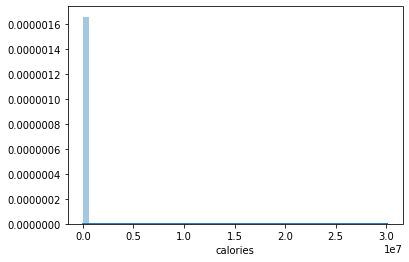

In [18]:
#Histograma da coluna calorias
sns.distplot(df_novo["calories"])

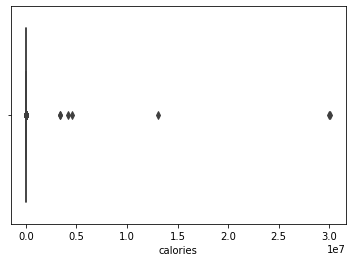

In [19]:
#Boxplot da coluna calorias
sns.boxplot(df_novo["calories"])

### Os gráficos acima nos mostram que temos uma concentração muito grande na parte inferior, e que possuímos alguns outliers(valores atípicos) nos dados,como já tínhamos desconfiado ao ordenarmos o dataset por calorias, sendo assim, iremos analisar a distribuição dos dados e uma possível solução para o balancemento dos mesmos

In [20]:
#Distribuição da coluna de calorias
print("A média das calorias é: " ,df_novo["calories"].mean())
print("A mediana das calorias é: " , df_novo["calories"].median())
print("O Q3 das calorias é: " , df_novo["calories"].quantile(0.75))
print("O Q1 das calorias é: " , df_novo["calories"].quantile(0.25))

A média das calorias é:  6609.487475915222
A mediana das calorias é:  345.0
O Q3 das calorias é:  599.0
O Q1 das calorias é:  205.0


### Como podemos observar, a média está muito alta e muito distante da mediana, possivelmente por conta dos valores muito altos que encontramos na base, esses valores podem ter sido inputados incorretamente, então, a abordagem que iremos adotar será a de encontrar esses valores atípicos e removê-los da nossa base.

In [21]:
#Cálculo para encontrar os outliers
IQR = df_novo["calories"].quantile(0.75) - df_novo["calories"].quantile(0.25) #distância interquartílica = Q3-Q1
calc =  1190.0 #(1,5 * IQR)
Q3 = df_novo["calories"].quantile(0.75)
Q1 = df_novo["calories"].quantile(0.25)
Lsuperior = Q3 + calc
Linferior = Q1 - calc

In [22]:
#Exibindo o limite superior e inferior
print("O limite superior é: ", Lsuperior)
print("O limite inferior é: ", Linferior)

O limite superior é:  1789.0
O limite inferior é:  -985.0


In [23]:
#Ordenando pela coluna de calorias
df_novo.sort_values(by="calories", ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0,['Stir together all ingredients except pastry ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['2 firm-ripe Anjou pears, peeled, cored, and ..."
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0,['Put a large baking sheet on oven rack in mid...,"['Egg', 'Fruit', 'Bake', 'Blueberry', 'Summer'...","['1 1/4 cups packed light brown sugar', '5 tab..."
19749,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0,['Position rack in center of oven and preheat ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['1 cup (packed) golden brown sugar', '2 large..."
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0,"['Soak bread in water to cover 30 minutes, the...","['Food Processor', 'Backyard BBQ', 'Ground Lam...","['3 slices firm white sandwich bread, torn int..."
1308,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0,['Wash rice in several changes of cold water i...,"['Lamb', 'Rice', 'Vegetable', 'Braise', 'Dinne...","['3 cups basmati rice (7 ounces)', '1 medium o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,"[Preheat oven to 350°F., Pack dough into a coo...",0.0,2004-08-20 12:48:48+00:00,"[Cookies, Dairy, Dessert, Bake, Winter, Gourmet]",0.0,Cylindrical cookie presses are a fast and conv...,0.0,2.500,Spritz Wreaths,[1/2 preparedBasic Butter Cookie Dough at room...,1.0,"['Preheat oven to 350°F.', 'Pack dough into a ...","['Cookies', 'Dairy', 'Dessert', 'Bake', 'Winte...",['1/2 preparedBasic Butter Cookie Dough at roo...
1483,"[To make the milk: In a high-speed blender, co...",NaN,2006-05-16 20:12:53+00:00,"[Nut, No-Cook, Raw]",0.0,Editor's note: The recipe and introductory tex...,NaN,0.000,Cashew Milk and Cashew Flour,"[3 cups raw cashews, soaked for 10 to 12 hours...",0.0,"['To make the milk: In a high-speed blender, c...","['Nut', 'No-Cook', 'Raw']","['3 cups raw cashews, soaked for 10 to 12 hour..."
6702,"[Tempering determines the final gloss, hardnes...",0.0,2006-05-16 20:12:54+00:00,"[Chocolate, Christmas]",0.0,Editor's note: The recipe below is excerpted f...,0.0,0.000,Tempering Chocolate,"[Bittersweet, semisweet, milk, or white chocol...",0.0,"['Tempering determines the final gloss, hardne...","['Chocolate', 'Christmas']","['Bittersweet, semisweet, milk, or white choco..."
285,"[When salting water for cooking, use 1 tablesp...",NaN,2004-08-20 04:00:00+00:00,"[Boil, Gourmet]",0.0,None,NaN,3.750,Salted Water for Boiling,"[Salt, Water]",0.0,"['When salting water for cooking, use 1 tables...","['Boil', 'Gourmet']","['Salt', 'Water']"


#### O código acima nos mostra que o limite superior é 1789, ou seja, qualquer valor de caloria acima disso é considerado um outlier, e o limite inferior deu um número negativo, sendo assim iremos considerar como outlier apenas o limite superior e com relação aos valores muito baixos em nosso conjunto de dados vamos descartar todo mundo abaixo de 10 porque acreditamos que nenhuma receita possa ter menos de 10 calorias

In [24]:
#Selecionando todas as receitas com calorias superiores a 10 e inferiores a 1979
df_final = df_novo.query("calories > 10 & calories < 1789")

In [25]:
#Shape final
df_final.shape

(14084, 14)

In [26]:
#Exibindo informações estatísticas
df_final.describe()

,fat,calories,protein,rating,sodium
count,14035.000000,14084.000000,14053.000000,14078.000000,14084.000000
mean,23.852512,429.774141,18.667046,3.754395,646.233953
std,23.014530,320.078171,24.822594,1.282913,2857.296325
min,0.000000,11.000000,0.000000,0.000000,0.000000
25%,8.000000,203.000000,3.000000,3.750000,85.000000
50%,18.000000,337.000000,8.000000,4.375000,293.000000
75%,32.000000,572.000000,26.000000,4.375000,691.000000
max,166.000000,1787.000000,310.000000,5.000000,132220.000000


In [27]:
#Distribuição da coluna de calorias do df final
print("A média das calorias é: " ,df_final["calories"].mean())
print("A mediana das calorias é: " , df_final["calories"].median())
print("O Q3 das calorias é: " , df_final["calories"].quantile(0.75))
print("O Q1 das calorias é: " , df_final["calories"].quantile(0.25))

A média das calorias é:  429.7741408690713
A mediana das calorias é:  337.0
O Q3 das calorias é:  572.0
O Q1 das calorias é:  203.0


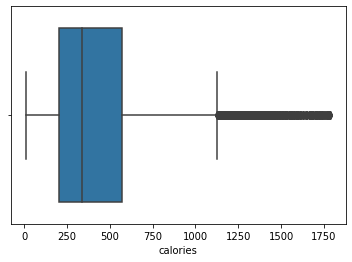

In [28]:
sns.boxplot(df_final["calories"])

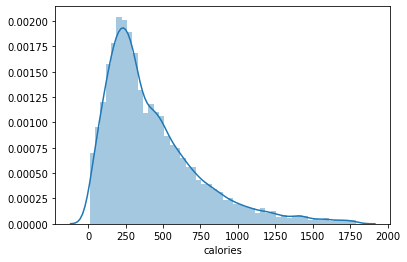

In [29]:
sns.distplot(df_final["calories"])

### Agora podemos analisar a diferença em nossos gráficos de boxplot e histograma,Temos uma melhor distribuição nos dados, podemos perceber que o boxplot ainda possui outliers, mas, é normal que ao excluir outlies apareçam outros, sendo assim, iremos trabalhar em cima desse novo dataset para responder a primeira pergunta: Quais categorias pertencem as comidas mais calóricas?

In [30]:
#Para encontrar as comidas mais calóricas iremos separar o Q3, que deixa 75% das observações abaixo e 25% acima.
df_mais_caloricas = df_final.query("calories > 572.0")
df_mais_caloricas.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
5,"[Mix basil, mayonnaise and butter in processor...",79.0,2004-08-20 04:00:00+00:00,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",948.0,This recipe can be prepared in 45 minutes or l...,19.0,4.375,The Best Blts,[2 1/2 cups (lightly packed) fresh basil leave...,1042.0,"['Mix basil, mayonnaise and butter in processo...","['Sandwich', 'Food Processor', 'Tomato', 'Kid-...",['2 1/2 cups (lightly packed) fresh basil leav...
9,[Chop enough parsley leaves to measure 1 table...,41.0,2008-10-23 22:24:26+00:00,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",602.0,Transform your picnic into un pique-nique to r...,23.0,3.750,Ham Persillade with Mustard Potato Salad and M...,"[6 long parsley sprigs, divided, 1 3/4 cups re...",1696.0,['Chop enough parsley leaves to measure 1 tabl...,"['Salad', 'Mustard', 'Potato', 'Picnic', 'Lunc...","['6 long parsley sprigs, divided', '1 3/4 cups..."
12,[Preheat oven to 350°F. Coat cake pans with no...,48.0,2012-09-18 04:00:00+00:00,"[Cake, Chocolate, Fruit, Dessert, Bake, Kid-Fr...",766.0,"This cake is perfect for beginners—it's moist,...",12.0,4.375,Banana-Chocolate Chip Cake With Peanut Butter ...,"[Nonstick vegetable oil spray, 3 cups all-purp...",439.0,['Preheat oven to 350°F. Coat cake pans with n...,"['Cake', 'Chocolate', 'Fruit', 'Dessert', 'Bak...","['Nonstick vegetable oil spray', '3 cups all-p..."
17,[Put oven rack in lower third of oven and preh...,68.0,2007-02-14 21:13:14+00:00,"[Onion, Pork, Vegetable, Braise, Sauté, Gourmet]",890.0,Pork all over Denmark is hauntingly tender. Ru...,59.0,4.375,Crisp Braised Pork Shoulder,[1 (4 1/2-lb) solid piece boneless pork should...,1027.0,['Put oven rack in lower third of oven and pre...,"['Onion', 'Pork', 'Vegetable', 'Braise', 'Saut...",['1 (4 1/2-lb) solid piece boneless pork shoul...
35,[Melt 2 tablespoons butter with vegetable oil ...,44.0,2004-08-20 04:00:00+00:00,"[Chicken, Olive, Onion, Sauté, Dinner, Vinegar...",625.0,None,39.0,3.750,Aztec Chicken,"[6 tablespoons (3/4 stick) chilled butter, 3 t...",1248.0,['Melt 2 tablespoons butter with vegetable oil...,"['Chicken', 'Olive', 'Onion', 'Sauté', 'Dinner...","['6 tablespoons (3/4 stick) chilled butter', '..."


Text(0, 0.5, 'Tags')

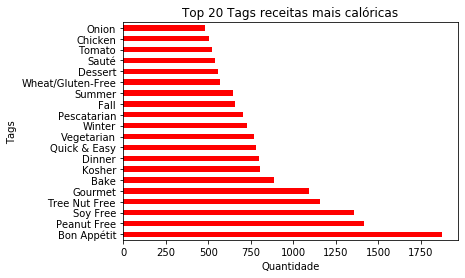

In [31]:
#Top 20 tags  (Categorias) mais utilizadas nas receitas mais calóricas 
%matplotlib inline
df_mais_caloricas["categories"].explode().value_counts(ascending=False).head(20).plot.barh(color="r")
plt.title("Top 20 Tags receitas mais calóricas")
plt.xlabel("Quantidade")
plt.ylabel("Tags")

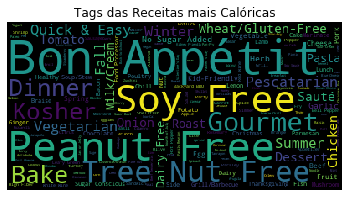

In [32]:
#Nuvem de palavras com as categorias mais utilizadas nas receitas mais calóricas
dict_word_calories = df_mais_caloricas["categories"].explode().value_counts().to_dict()
wordcloud = WordCloud().fit_words(dict_word_calories)
wordcloud
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Tags das Receitas mais Calóricas")
plt.show()

In [33]:
#Top 50 tags Receitas mais calóricas
df_mais_caloricas["categories"].explode().value_counts().head(50)

Bon Appétit          1873
Peanut Free          1414
Soy Free             1354
Tree Nut Free        1157
Gourmet              1092
Bake                  884
Kosher                802
Dinner                797
Quick & Easy          779
Vegetarian            770
Winter                729
Pescatarian           705
Fall                  657
Summer                645
Wheat/Gluten-Free     570
Dessert               559
Sauté                 541
Tomato                523
Chicken               505
Onion                 483
Dairy Free            423
Roast                 422
Pasta                 421
Milk/Cream            413
No Sugar Added        413
Garlic                384
Herb                  374
Kid-Friendly          349
Pork                  337
Vegetable             330
Cheese                326
Fruit                 320
Beef                  314
Spring                306
Egg                   285
Sugar Conscious       281
Grill/Barbecue        281
Lunch                 264
Dairy       

# Top 10 Ingredientes

In [34]:
# vendo palavras para eliminar
list(df_mais_caloricas["ingredients"].explode().apply(lambda x: x.lower()))

['2 1/2 cups (lightly packed) fresh basil leaves',
 '1 cup mayonnaise',
 '1/4 cup butter, room temperature',
 '12 thick-sliced bacon strips (about 1 pound)',
 '12 1/2-inch-thick slices fresh country-style white bread',
 '3 large tomatoes, cut into 1/4-inch-thick rounds',
 '2 ripe avocados, pitted, peeled, sliced',
 '1 red onion, thinly sliced',
 '6 lettuce leaves',
 '6 long parsley sprigs, divided',
 '1 3/4 cups reduced-sodium chicken broth',
 '1 large garlic clove, minced',
 '2 teaspoon unflavored gelatin (from 1 envelope)',
 '3 tablespoons water',
 '1 (3/4-pound) piece baked ham, cut into 1/2-inch cubes (2 cups)',
 '1/2 cup mayonnaise',
 '2 tablespoons dijon mustard',
 '2 tablespoons white-wine vinegar',
 '2 celery ribs, finely chopped (1 cup)',
 '1/4 cup chopped cornichons or sour gherkins',
 '1 pound boiled potatoes, peeled and cut into 1/2-inch cubes (2 1/2 cups)',
 '1 (10-ounce) box frozen baby peas, thawed',
 '2 teaspoons finely chopped marjoram',
 '3 tablespoons extra-virgin ol

### Como nos mostra o código anterior, na lista de ingredientes contém algumas palavras que não são os ingredientes em si,exemplo: 4 teaspoons olive oil', nesse caso o ingrediente é o azeite. Nesses casos criaremos uma função para extrair apenas os ingredientes

In [35]:
def clean_ingredient(x):
    x = x.lower()
    x = re.sub(r"/S+", "", x).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
   
    stopwords = [str(n) for n in list(range(0,50))]+["teaspoon","teaspoons","tablespoon","tablespoons",\
                                       "cup","cups","grams","chopped","peeled","cut","into","chunk","small",\
                                       "large","ounce","dash","fresh","and","for","qt","about","ten","two","inch",\
                                      "half","oz","medium","for","crushed","to","hours","in","raw","of","or","dried","dry","3/4",\
                                        "1/4","1/2"]
    
    ingredients_word_list = [ x.strip() for x in x.split(" ")]
    temp = list(filter((lambda x: x not in stopwords), ingredients_word_list))
        
    return " ".join(temp)

df_ingredients = df_mais_caloricas["ingredients"].explode()
df_ingredients = df_ingredients.apply(lambda x: clean_ingredient(x))

In [36]:
#Top 10 Ingredientes
df_ingredients.value_counts(ascending=False).head(10)

olive oil            998
salt                 980
sugar                810
water                513
lemon juice          438
vegetable oil        405
eggs                 363
white wine           323
all purpose flour    318
kosher salt          312
Name: ingredients, dtype: int64

Text(0, 0.5, 'Ingredientes')

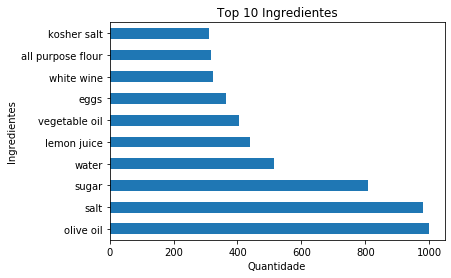

In [37]:
#Gráfico Top 10 Ingredientes
df_ingredients.value_counts(ascending=False).head(10).plot.barh()
plt.title("Top 10 Ingredientes")
plt.xlabel("Quantidade")
plt.ylabel("Ingredientes")

# Recomendação de 3 receitas(Analisando os dados)

In [38]:
#Ordenando o dataset pela nota de avaliação
df_final.sort_values(by="rating", ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
14586,[1. Make the dough and let it rise until doubl...,20.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Dairy, Herb, Potato, Bake, Super ...",698.0,"Try this recipe, inspired by a visit to a pizz...",16.0,5.0,Potato Pizza,"[3/4 cup lukewarm water, 1 1/2 teaspoons dry y...",284.0,['1. Make the dough and let it rise until doub...,"['Milk/Cream', 'Dairy', 'Herb', 'Potato', 'Bak...","['3/4 cup lukewarm water', '1 1/2 teaspoons dr..."
2599,[Boil dried tart cherries and orange juice in ...,26.0,2005-03-01 04:00:00+00:00,"[Cake, Chocolate, Fruit, Nut, Dessert, Freeze/...",587.0,"Inspired by Neapolitan ice cream, this pretty ...",7.0,5.0,"Chocolate-Cherry, Pistachio, and Raspberry Ice...","[1/2 cup dried tart cherries, 1/2 cup orange j...",172.0,['Boil dried tart cherries and orange juice in...,"['Cake', 'Chocolate', 'Fruit', 'Nut', 'Dessert...","['1/2 cup dried tart cherries', '1/2 cup orang..."
6088,[Preheat oven to 325° F. Butter and flour 10-i...,36.0,2004-08-20 04:00:00+00:00,"[Cake, Fruit, Dessert, Bake, Christmas, Date, ...",785.0,None,11.0,5.0,Lorrie's Mother's Fruitcake,"[3 cups all purpose flour, 1 tablespoon baking...",260.0,['Preheat oven to 325° F. Butter and flour 10-...,"['Cake', 'Fruit', 'Dessert', 'Bake', 'Christma...","['3 cups all purpose flour', '1 tablespoon bak..."
4777,[Blend all ingredients in processor. Transfer ...,22.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, Mayonnaise, Curry, Winter, ...",266.0,This recipe was created to accompany Crudités ...,0.0,5.0,Sweet Chutney,[1 cup mayonnaise or reduced calorie mayonnais...,182.0,['Blend all ingredients in processor. Transfer...,"['Condiment/Spread', 'Mayonnaise', 'Curry', 'W...",['1 cup mayonnaise or reduced calorie mayonnai...
11254,[Lightly oil a straight-sided 2-cup mold or so...,9.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Food Processor, No-Cook, Buffet, ...",127.0,Companion recipe to Smoked Fish Trio .,10.0,5.0,Smoked Trout Mousse,[2 smoked trout fillets* (about 8 ounces total...,328.0,['Lightly oil a straight-sided 2-cup mold or s...,"['Milk/Cream', 'Food Processor', 'No-Cook', 'B...",['2 smoked trout fillets* (about 8 ounces tota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,[Whisk together sauce ingredients in a bowl un...,22.0,2012-11-27 04:00:00+00:00,[],579.0,We like to think of the summer roll as an eleg...,20.0,NaN,Spicy Summer Rolls with Peanut Dipping Sauce,"[2/3 cup hoisin sauce (see Cooks' notes:), 1/3...",1160.0,['Whisk together sauce ingredients in a bowl u...,[],"[""2/3 cup hoisin sauce (see Cooks' notes:)"", '..."
3931,[Beat 1/2 cup cream in a medium bowl until sti...,17.0,2013-01-07 04:00:00+00:00,[],255.0,Dark chocolate and espresso add the slightly b...,5.0,NaN,Classic Chocolate Mousse,"[3/4 cup chilled heavy cream, divided, 4 large...",74.0,['Beat 1/2 cup cream in a medium bowl until st...,[],"['3/4 cup chilled heavy cream, divided', '4 la..."
8262,"[Preheat oven to 400°. Wash beets, leaving som...",0.0,2011-12-09 04:00:00+00:00,[],117.0,Our fresh take on the classic Moroccan salad p...,3.0,NaN,"Blood Orange, Beet, and Fennel Salad","[2 medium red beets, tops trimmed, 2 medium go...",51.0,"['Preheat oven to 400°. Wash beets, leaving so...",[],"['2 medium red beets, tops trimmed', '2 medium..."
12077,[Place pears and granulated sugar in a medium ...,18.0,2013-09-18 04:00:00+00:00,[],355.0,"When we were first dating, we would stay up in...",4.0,NaN,Tarte Bourdaloue,"[2 Bosc or Anjou pears, peeled, cored and quar...",269.0,['Place pears and granulated sugar in a medium...,[],"['2 Bosc or Anjou pears, peeled, cored and qua..."


In [39]:
#Selecionando as receitas mais bem avaliadas e menos calóricas
rec = df_final.query("calories < 300.0 & rating > 4.0")

In [40]:
#Shape
rec.shape

(3052, 14)

In [41]:
#Exibindo o Top 30 das tags que estão entre as receitas com notas altas e de baixa caloria
rec["categories"].explode().value_counts(ascending=False).head(30)

Bon Appétit          1364
Peanut Free          1327
Soy Free             1304
Vegetarian           1290
Gourmet              1180
Tree Nut Free        1145
Pescatarian          1124
Kosher               1116
Wheat/Gluten-Free     972
Quick & Easy          912
Summer                678
Side                  662
Kidney Friendly       607
Bake                  603
Dairy Free            577
Dessert               568
No Sugar Added        525
Sugar Conscious       452
Fall                  442
Vegan                 438
Winter                418
Healthy               349
Fruit                 338
Onion                 335
Vegetable             330
Salad                 327
No-Cook               326
Appetizer             321
Thanksgiving          309
Milk/Cream            303
Name: categories, dtype: int64

In [42]:
#Selecionando receitas veganas
df_rec_vegan = rec[rec["categories"].fillna("None").apply(lambda x: "Vegan" in x)]

In [43]:
#Shape do dataset vegano
df_rec_vegan.shape

(438, 14)

In [44]:
#Exibindo as 5 primeiras linhas
df_rec_vegan.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
37,[Cut off and discard 1 inch from stem ends of ...,10.0,2004-08-20 04:00:00+00:00,"[Garlic, Side, Sauté, Vegetarian, Quick & Easy...",107.0,Active time: 25 min Start to finish: 30 min,4.0,4.375,Sauteed Broccoli Rabe,"[2 lb broccoli rabe, 3 large garlic cloves, th...",329.0,['Cut off and discard 1 inch from stem ends of...,"['Garlic', 'Side', 'Sauté', 'Vegetarian', 'Qui...","['2 lb broccoli rabe', '3 large garlic cloves,..."
49,[Cut peel and white pith from grapefruits and ...,1.0,2004-08-20 04:00:00+00:00,"[Salad, Breakfast, Brunch, No-Cook, Quick & Ea...",191.0,None,3.0,4.375,Citrus Salad with Mint Sugar,"[2 white grapefruits, 2 pink grapefruits, 6 la...",4.0,['Cut peel and white pith from grapefruits and...,"['Salad', 'Breakfast', 'Brunch', 'No-Cook', 'Q...","['2 white grapefruits', '2 pink grapefruits', ..."
166,[Trim stalks and cut fennel bulb lengthwise in...,4.0,2004-08-20 04:00:00+00:00,"[Vegetable, Side, Sauté, Vegetarian, Fennel, C...",97.0,These vegetables would complement not only lam...,2.0,4.375,Sauteed Fennel and Carrots,[1 fennel bulb (sometimes called anise; about ...,81.0,['Trim stalks and cut fennel bulb lengthwise i...,"['Vegetable', 'Side', 'Sauté', 'Vegetarian', '...",['1 fennel bulb (sometimes called anise; about...
271,[Divide the berries equally among four bowls. ...,7.0,2016-01-01 13:50:00+00:00,"[HarperCollins, Breakfast, Quinoa, Berry, Almo...",173.0,Breakfast bowls are the new green juice: they'...,5.0,5.000,Breakfast Bowl With Quinoa and Berries,"[4 cups mixed berries (raspberries, strawberri...",3.0,['Divide the berries equally among four bowls....,"['HarperCollins', 'Breakfast', 'Quinoa', 'Berr...","['4 cups mixed berries (raspberries, strawberr..."
388,"[Pur&eaacute;e tomatillos, half of tomatoes, a...",5.0,2009-08-20 04:00:00+00:00,"[Onion, Tomato, Appetizer, Dinner, Lunch, Summ...",80.0,Celebrate the last of the hot weather with a s...,2.0,4.375,Tomato and Tomatillo Gazpacho,"[1/2 pound fresh tomatillos, husked, rinsed, a...",10.0,"['Pur&eaacute;e tomatillos, half of tomatoes, ...","['Onion', 'Tomato', 'Appetizer', 'Dinner', 'Lu...","['1/2 pound fresh tomatillos, husked, rinsed, ..."


In [45]:
#Categorias receitas veganas
df_rec_vegan["categories"].explode().value_counts().head(60)

Vegan                438
Vegetarian           415
Kosher               340
Pescatarian          339
Peanut Free          328
Dairy Free           328
Soy Free             321
Wheat/Gluten-Free    321
Tree Nut Free        295
Side                 228
Bon Appétit          198
Quick & Easy         172
Gourmet              157
No Sugar Added       147
Healthy              125
Summer               122
Kidney Friendly      106
Paleo                 94
Fat Free              91
Dessert               89
Salad                 89
Fruit                 83
Sugar Conscious       82
Vegetable             74
Fall                  67
No-Cook               65
Onion                 62
Thanksgiving          55
Sauce                 55
Low Cal               48
Winter                47
Orange                44
Condiment/Spread      42
Garlic                42
Spring                42
Low Cholesterol       41
Tomato                41
Ginger                39
Roast                 39
Leafy Green           38


In [46]:
#Selecionando Sobremesas veganas
rec1 = df_rec_vegan[df_rec_vegan["categories"].apply(lambda x: "Dessert" in x)]

In [47]:
#Ordenando pela nota de avaliação
rec1.sort_values(by="rating", ascending=False).head(60)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
6487,[Puree watermelon in processor (there should b...,0.0,2006-06-13 16:02:42+00:00,"[Dessert, Freeze/Chill, Kid-Friendly, Frozen D...",21.0,"Brandi Neuwirth of Cary, North Carolina, write...",0.0,5.000,Watermelon-Mint Ice Cubes,[6 cups 1-inch cubes seeded watermelon (about ...,6.0,['Puree watermelon in processor (there should ...,"['Dessert', 'Freeze/Chill', 'Kid-Friendly', 'F...",['6 cups 1-inch cubes seeded watermelon (about...
5300,[Stir together all ingredients and freeze in i...,1.0,2005-04-19 19:17:39+00:00,"[Ice Cream Machine, Fruit, Dessert, Freeze/Chi...",223.0,"Nieve, or ""snow,"" is Mexico's sorbet, sold fro...",3.0,5.000,Passion-Fruit Nieve,"[3 cups passion-fruit nectar (24 fl oz), chill...",57.0,['Stir together all ingredients and freeze in ...,"['Ice Cream Machine', 'Fruit', 'Dessert', 'Fre...","['3 cups passion-fruit nectar (24 fl oz), chil..."
6264,[Cut peel and white pith from oranges. Working...,0.0,2004-08-20 04:00:00+00:00,"[Salad, Citrus, Brunch, Dessert, No-Cook, Stra...",86.0,"A colorful combination of oranges, berries and...",1.0,5.000,Fresh Fruit Compote with Hazelnut-Cinnamon Bis...,"[3 large oranges, 1 16-ounce basket fresh stra...",2.0,['Cut peel and white pith from oranges. Workin...,"['Salad', 'Citrus', 'Brunch', 'Dessert', 'No-C...","['3 large oranges', '1 16-ounce basket fresh s..."
15576,[Place 1 1/2 pounds strawberries and rhubarb i...,1.0,2004-08-20 04:00:00+00:00,"[Sauce, Ginger, Dessert, Quick & Easy, Strawbe...",279.0,This recipe is an accompaniment for Vanilla-Ci...,3.0,5.000,Strawberry-Rhubarb Compote with Ginger and Lime,"[2 pounds strawberries, halved if large, 1 pou...",18.0,['Place 1 1/2 pounds strawberries and rhubarb ...,"['Sauce', 'Ginger', 'Dessert', 'Quick & Easy',...","['2 pounds strawberries, halved if large', '1 ..."
6752,[Cut figs into 1-inch pieces. Boil cider with ...,0.0,2008-09-16 04:00:00+00:00,"[Sauce, Fruit Juice, Pepper, Breakfast, Brunch...",137.0,None,1.0,5.000,Peppery Fig and Cider Compote,"[8 ounces dried Mission figs, stemmed, 1 1/2 c...",5.0,['Cut figs into 1-inch pieces. Boil cider with...,"['Sauce', 'Fruit Juice', 'Pepper', 'Breakfast'...","['8 ounces dried Mission figs, stemmed', '1 1/..."
7513,[Stir first 3 ingredients in small bowl until ...,0.0,2005-05-05 18:56:12+00:00,"[Berry, Fruit, Dessert, Freeze/Chill, Frozen D...",212.0,None,1.0,5.000,Fresh Strawberry Granita,"[1 cup hot water, 3/4 cup sugar, 2 tablespoons...",4.0,['Stir first 3 ingredients in small bowl until...,"['Berry', 'Fruit', 'Dessert', 'Freeze/Chill', ...","['1 cup hot water', '3/4 cup sugar', '2 tables..."
7574,"[Gently toss sliced peaches, golden brown suga...",1.0,2004-08-20 04:00:00+00:00,"[Fruit, Dessert, No-Cook, Peach, Summer, Vegan...",159.0,This recipe is an accompaniment for Warm Peach...,2.0,5.000,Brown Sugar Peaches,"[3 pounds fresh peaches, peeled, pitted, slice...",5.0,"['Gently toss sliced peaches, golden brown sug...","['Fruit', 'Dessert', 'No-Cook', 'Peach', 'Summ...","['3 pounds fresh peaches, peeled, pitted, slic..."
7807,[Mix first 6 ingredients in large bowl. (Can b...,2.0,2004-08-20 04:00:00+00:00,"[Salad, Fruit, Dessert, Side, Low Sodium, Cant...",265.0,None,2.0,5.000,Asian Fruit Salad with Papaya-Mint Sauce,"[1/2 large pineapple, peeled, cored, cut into ...",25.0,['Mix first 6 ingredients in large bowl. (Can ...,"['Salad', 'Fruit', 'Dessert', 'Side', 'Low Sod...","['1/2 large pineapple, peeled, cored, cut into..."
8049,"[Bring water, sugar, and lemon juice to a boil...",0.0,2014-04-02 04:00:00+00:00,"[Dessert, Easter, Strawberry, Fat Free, Kidney...",127.0,"""Strawberries and Sambuca are such a wonderful...",1.0,5.000,Strawberries in Sambuca,"[1 cup water, 1/2 cup sugar, 3 tablespoons fre...",4.0,"['Bring water, sugar, and lemon juice to a boi...","['Dessert', 'Easter', 'Strawberry', 'Fat Free'...","['1 cup water', '1/2 cup su

In [48]:
#Extraindo o Título das receitas
rec1.title.values

array(['Dried Fruit Compote with Port, Cinnamon, and Ginger',
       'Peaches in Ginger Syrup', 'Pistachio Brittle',
       'Grilled Peaches with Black Pepper and Basil-Lime Syrup',
       'Candied Citrus Peel', 'Melon and Berry Compote',
       'Cherry-Apricot Compote', 'Cranberry and Candied Orange Chutney',
       'Sherry Vinegar Syrup',
       'Fresh Strawberry Sorbet with Shortbread Cookies',
       'Fresh Ginger and Citrus Sorbet', 'Fresh Strawberry Sorbet',
       'Honeydew and Cantaloupe with Cinnamon-Clove Syrup',
       'Oranges and Pineapple with Orange-Flower Water and Mint',
       'Cantaloupe Sorbet with Melon Confetti Compote',
       'Brandied Dried Cranberries and Cherries',
       'Melon Carpaccio with Lime', 'Star-Fruit Chips',
       'Pineapple Paletas', 'Fresh Oranges with Spiced Red Wine Syrup',
       'Plum Applesauce', 'Simple Syrup',
       'Broiled Plums with Mango Sorbet',
       'Mango, Blueberry, and Ginger Fruit Salad', 'Passion-Fruit Nieve',
       'Necta

In [49]:
#Tags das Receitas escolhidas
rec1["categories"].explode().value_counts().head(60)

Vegan                89
Dessert              89
Vegetarian           76
Soy Free             75
Pescatarian          75
Kosher               75
Dairy Free           74
Peanut Free          74
Wheat/Gluten-Free    73
Tree Nut Free        68
Bon Appétit          50
Kidney Friendly      49
Fruit                46
Summer               43
Fat Free             42
Quick & Easy         29
Gourmet              29
Frozen Dessert       17
Freeze/Chill         17
Sauce                17
Winter               15
Orange               15
Low Sodium           15
Strawberry           15
Berry                14
Spring               14
Kid-Friendly         14
Citrus               13
Brunch               12
No-Cook              11
Ginger               11
Mint                 11
Fall                 10
Healthy              10
Cinnamon              9
Simmer                8
Chill                 7
Blueberry             7
Low Fat               7
Thanksgiving          7
Lemon                 7
Christmas       

In [50]:
#Selecionando das sobremesas veganas quem possuem a tag Quick & Easy
sobremesas_veganas_rapidas = rec1[rec1["categories"].apply(lambda x: "Quick & Easy" in x)].reset_index()

In [51]:
#Ordenando as sobremesas pela nota de avaliaçao
sobremesas_veganas_rapidas.sort_values(by="rating", ascending=False)

,index,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
22,15576,[Place 1 1/2 pounds strawberries and rhubarb i...,1.0,2004-08-20 04:00:00+00:00,"[Sauce, Ginger, Dessert, Quick & Easy, Strawbe...",279.0,This recipe is an accompaniment for Vanilla-Ci...,3.0,5.000,Strawberry-Rhubarb Compote with Ginger and Lime,"[2 pounds strawberries, halved if large, 1 pou...",18.0,['Place 1 1/2 pounds strawberries and rhubarb ...,"['Sauce', 'Ginger', 'Dessert', 'Quick & Easy',...","['2 pounds strawberries, halved if large', '1 ..."
18,13097,[Combine 3 cups water and sugar in heavy large...,0.0,2004-08-20 04:00:00+00:00,"[Fruit, Dessert, Christmas, Quick & Easy, Low ...",147.0,This dessert traditionally should have twelve ...,1.0,5.000,Twelve-Fruit Compote,"[3 cups water, 1 cup sugar, 1 pound mixed drie...",11.0,['Combine 3 cups water and sugar in heavy larg...,"['Fruit', 'Dessert', 'Christmas', 'Quick & Eas...","['3 cups water', '1 cup sugar', '1 pound mixed..."
16,11784,"[Combine rhubarb, sugar, and 1/4 cup water in ...",0.0,2008-04-01 22:50:45+00:00,"[Fruit, Breakfast, Brunch, Dessert, Low Fat, Q...",193.0,Serve the compote over vanilla or strawberry i...,2.0,5.000,Rhubarb and Strawberry Compote with Fresh Mint,[3 cups 1/2-inch-wide pieces fresh rhubarb (cu...,7.0,"['Combine rhubarb, sugar, and 1/4 cup water in...","['Fruit', 'Breakfast', 'Brunch', 'Dessert', 'L...",['3 cups 1/2-inch-wide pieces fresh rhubarb (c...
15,11675,"[Purée frozen berries, corn syrup, rum to tast...",1.0,2004-08-20 04:00:00+00:00,"[Rum, Berry, Fruit, Dessert, No-Cook, Picnic, ...",214.0,This is a refreshing and fast adults-only dess...,2.0,5.000,Strawberry Daiquiri Slush with Honeydew Melon,[1 (12-oz) package frozen unsweetened strawber...,70.0,"['Purée frozen berries, corn syrup, rum to tas...","['Rum', 'Berry', 'Fruit', 'Dessert', 'No-Cook'...",['1 (12-oz) package frozen unsweetened strawbe...
1,899,"[In a saucepan over medium heat, combine the 1...",4.0,2014-07-02 04:00:00+00:00,"[Dessert, Picnic, Kid-Friendly, Quick & Easy, ...",173.0,The black pepper adds a surprising aromatic an...,2.0,5.000,Grilled Peaches with Black Pepper and Basil-Li...,"[1/2 cup brown sugar, plus more, for sprinklin...",6.0,"['In a saucepan over medium heat, combine the ...","['Dessert', 'Picnic', 'Kid-Friendly', 'Quick &...","['1/2 cup brown sugar, plus more, for sprinkli..."
13,11147,[Combine all the fruit in a large bowl and sti...,2.0,2010-03-11 04:00:00+00:00,"[Fruit, Brunch, Dessert, Quick & Easy, Blueber...",245.0,"When I was growing up, my mom would cut up fre...",4.0,5.000,"Fruit Salad with Herb, Citrus, Mint-Maple, or ...","[1 pint strawberries, hulled and halved, 1 hal...",17.0,"[""Combine all the fruit in a large bowl and st...","['Fruit', 'Brunch', 'Dessert', 'Quick & Easy',...","['1 pint strawberries, hulled and halved', '1 ..."
20,14968,"[Combine cherries, 1 cup raspberries, sugar an...",0.0,2004-08-20 04:00:00+00:00,"[Sauce, Fruit, Dessert, Quick & Easy, Low Sodi...",110.0,Try this cinnamon-scented sauce over vanilla i...,1.0,5.000,Bing Cherry and Raspberry Sauce,"[2 cups coarsely chopped pitted Bing cherries,...",1.0,"['Combine cherries, 1 cup raspberries, sugar a...","['Sauce', 'Fruit', 'Dessert', 'Quick & Easy', ...",['2 cups coarsely chopped pitted Bing cherries...
11,8626,"[In small bowl, whisk together sugar and 1/4 c...",1.0,2007-06-05 21:20:07+00:00,"[Fruit, Dessert, No-Cook, Fourth of July, Picn...",162.0,Be sure to start this recipe at least 1 1/2 ho...,3.0,5.000,Watermelon and Cantaloupe Wedges with Lime-Min...,"[1/4 cup sugar, 1/4 cup fresh lime juice (from...",35.0,"['In small bowl, whisk together sugar and 1/4 ...","['Fruit', 'Dessert', 'No-Cook', 'Fourth of Jul...","['1/4 cup sugar', '1/4 cup fresh lime juice (f..."
19,13113,[Puree 1 pound strawberries in processor. Tran...,0.0,2004-08-20 04:00:00+00:00,"[Sauce, Food Processor, Fruit, Dessert, Quick ...",108.0,None,1.0

### Com base nos dados analisados, segue abaixo as 3 recomendações de receitas, foram escolhidas para o público vegano que gostam de preparar receitas rápidas de sobremesa
### As 3 sobremesas em questão foram escolhidas pelo fato de terem uma ótima avaliação, por serem fáceis e rápidas de fazer, 2 delas não incluem gorduras em seus ingredientes,  e principalmente porque possuem um teor baixo de calorias(<200)

In [52]:
#Aqui estão as 3 receitas esolhidas para a recomendação
sobremesas_veganas_rapidas.iloc[[23, 16, 8]]

,index,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
23,16097,[Whisk all ingredients in medium bowl. Transfe...,9.0,2004-08-20 04:00:00+00:00,"[Rum, Fruit, Dessert, Quick & Easy, Frozen Des...",190.0,None,1.0,4.375,Quick Coconut Sorbet,[1 15-ounce can cream of coconut (such as Coco...,20.0,['Whisk all ingredients in medium bowl. Transf...,"['Rum', 'Fruit', 'Dessert', 'Quick & Easy', 'F...",['1 15-ounce can cream of coconut (such as Coc...
16,11784,"[Combine rhubarb, sugar, and 1/4 cup water in ...",0.0,2008-04-01 22:50:45+00:00,"[Fruit, Breakfast, Brunch, Dessert, Low Fat, Q...",193.0,Serve the compote over vanilla or strawberry i...,2.0,5.000,Rhubarb and Strawberry Compote with Fresh Mint,[3 cups 1/2-inch-wide pieces fresh rhubarb (cu...,7.0,"['Combine rhubarb, sugar, and 1/4 cup water in...","['Fruit', 'Breakfast', 'Brunch', 'Dessert', 'L...",['3 cups 1/2-inch-wide pieces fresh rhubarb (c...
8,6752,[Cut figs into 1-inch pieces. Boil cider with ...,0.0,2008-09-16 04:00:00+00:00,"[Sauce, Fruit Juice, Pepper, Breakfast, Brunch...",137.0,None,1.0,5.000,Peppery Fig and Cider Compote,"[8 ounces dried Mission figs, stemmed, 1 1/2 c...",5.0,['Cut figs into 1-inch pieces. Boil cider with...,"['Sauce', 'Fruit Juice', 'Pepper', 'Breakfast'...","['8 ounces dried Mission figs, stemmed', '1 1/..."


# 4 Características presentes nos dados(com base na alta nota)

### Primeiro passo será separar as receitas com melhores e piores avaliação

In [53]:
#Separando as receitas
notas_altas = df_final.query("rating >= 3.0")
notas_baixas = df_final.query("rating < 3.0")

In [54]:
#Shape
notas_altas.shape

(12381, 14)

In [55]:
#Verificando valores nulos
notas_altas.isnull().sum()

directions               0
fat                     18
date                     0
categories               0
calories                 0
desc                  4107
protein                 12
rating                   0
title                    0
ingredients              0
sodium                   0
directions_string        0
categories_string        0
ingredients_string       0
dtype: int64

In [56]:
#Exibindo as 5 primeiras linhas
notas_altas.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,['Combine first 9 ingredients in heavy medium ...,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...","['1 1/2 cups whipping cream', '2 medium onions..."
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,['In a large heavy saucepan cook diced fennel ...,"['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...","['1 fennel bulb (sometimes called anise), stal..."
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,['Preheat oven to 350°F. Lightly grease 8x8x2-...,"['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...","['1 12-ounce package frozen spinach soufflé, t..."
5,"[Mix basil, mayonnaise and butter in processor...",79.0,2004-08-20 04:00:00+00:00,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",948.0,This recipe can be prepared in 45 minutes or l...,19.0,4.375,The Best Blts,[2 1/2 cups (lightly packed) fresh basil leave...,1042.0,"['Mix basil, mayonnaise and butter in processo...","['Sandwich', 'Food Processor', 'Tomato', 'Kid-...",['2 1/2 cups (lightly packed) fresh basil leav...
8,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,2004-08-20 04:00:00+00:00,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",170.0,Bulgogi,7.0,4.375,Korean Marinated Beef,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",1272.0,"['Stir together soy sauce, sugar, sesame oil, ...","['Beef', 'Ginger', 'Sauté', 'Stir-Fry', 'Quick...","['1/4 cup soy sauce', '1 tablespoon sugar', '2..."


In [57]:
#Shape notas baixas
notas_baixas.shape

(1697, 14)

In [58]:
#Verificando valores nulos
notas_baixas.isnull().sum()

directions              0
fat                    31
date                    0
categories              0
calories                0
desc                  661
protein                19
rating                  0
title                   0
ingredients             0
sodium                  0
directions_string       0
categories_string       0
ingredients_string      0
dtype: int64

In [59]:
#Exibindo as 5 primeiras linhas
notas_baixas.head(10)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,"['1. Place the stock, lentils, celery, carrot,...","['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...",['4 cups low-sodium vegetable or chicken stock...
16,[Butter and sugar six 2/3-to 3/4-cup ramekins....,5.0,2008-12-04 04:00:00+00:00,"[Bread, Milk/Cream, Breakfast, Brunch, Dessert...",146.0,Classic spoon bread is a savory pudding served...,4.0,1.875,Sweet Buttermilk Spoon Breads,"[1 cup water, 2/3 cup buttermilk, 1/3 cup heav...",160.0,['Butter and sugar six 2/3-to 3/4-cup ramekins...,"['Bread', 'Milk/Cream', 'Breakfast', 'Brunch',...","['1 cup water', '2/3 cup buttermilk', '1/3 cup..."
25,[Mince garlic and mash to a paste with a pinch...,7.0,2004-08-20 04:00:00+00:00,"[Bread, Condiment/Spread, Fry, No-Cook, Quick ...",95.0,None,1.0,0.000,Garlic Baguette Crumbs,"[1 garlic clove, 2 tablespoons olive oil, 1/4 ...",103.0,['Mince garlic and mash to a paste with a pinc...,"['Bread', 'Condiment/Spread', 'Fry', 'No-Cook'...","['1 garlic clove', '2 tablespoons olive oil', ..."
27,[Preheat oven to 275°F. Mix sugar and spices i...,0.0,2007-07-26 17:36:37+00:00,"[Bake, Kid-Friendly, Pear, Spice, Healthy, Bon...",14.0,"Use a V-slicer (a simple, inexpensive version ...",0.0,2.500,Dried Pear Crisps,"[1 tablespoon sugar, 1/4 teaspoon ground ginge...",0.0,['Preheat oven to 275°F. Mix sugar and spices ...,"['Bake', 'Kid-Friendly', 'Pear', 'Spice', 'Hea...","['1 tablespoon sugar', '1/4 teaspoon ground gi..."
39,"[Whisk together flour (2 cups), sugar, salt, a...",6.0,2006-07-24 18:27:47+00:00,"[Bread, Side, Vegetarian, Grill, Grill/Barbecu...",145.0,Cooking these flatbreads in a grill pan gives ...,3.0,2.500,Better-Than-Pita Grill Bread,[2 cups all-purpose flour plus additional for ...,208.0,"['Whisk together flour (2 cups), sugar, salt, ...","['Bread', 'Side', 'Vegetarian', 'Grill', 'Gril...",['2 cups all-purpose flour plus additional for...
63,[Preheat the oven to 350ºF. Grease a 10-inch r...,19.0,2016-08-31 21:13:22.157000+00:00,"[Cake, Molasses, Buttermilk, Bake, Cornmeal, S...",523.0,Eastern Kentucky–born and –raised chef Colin P...,8.0,0.000,Colin Perry’s Sorghum and Apple Sticky Pudding,"[1/4 pound leaf lard, cut into large cubes, at...",694.0,['Preheat the oven to 350ºF. Grease a 10-inch ...,"['Cake', 'Molasses', 'Buttermilk', 'Bake', 'Co...","['1/4 pound leaf lard, cut into large cubes, a..."
69,[1 Heat the olive oil in a 3- or 4-quart sauce...,5.0,2013-09-20 04:00:00+00:00,"[Herb, Tomato, Vegetable, Side, Basil, Bulgur,...",195.0,When an abundance of fresh vine-ripened tomato...,7.0,0.000,Tomato-Infused Bulgur Pilaf with Fresh Basil,"[1 tablespoon extra-virgin olive oil, 1 cup re...",469.0,['1 Heat the olive oil in a 3- or 4-quart sauc...,"['Herb', 'Tomato', 'Vegetable', 'Side', 'Basil...","['1 tablespoon extra-virgin olive oil', '1 cup..."
87,"[Bring 5 cups water to a boil in a medium pot,...",77.0,2016-11-21 21:53:28.237000+00:00,"[Bon Appétit, Dinner, Chicken, Grains, Wheat/G...",1143.0,"Sorghum is a gluten-free grain, with a texture...",63.0,0.000,Roast Chicken With Sorghum and Squash,"[Kosher salt, 1 cup sorghum, 1/2 large buttern...",311.0,['Bring 5 cups water to a boil in a medium pot...,"['Bon Appétit', 'Dinner', 'Chicken', 'Grains',...","['Kosher salt', '1 cup sorghum', '1/2 large bu..."
95,"[At Kachka, they make mayo from scratch. But H...",34.0,2014-12-02 04:00:00+00:00,"[Sauce, Salad Dressing, Condiment, Mayonnaise,...",306.0,None,0.0,0.000,Parsley Mayo,"[1 1/2 cups (packed) fresh parsley leaves, 1 1...",302.0,"[""At Kachka, they make mayo from scratch. But ...","['Sauce', 'Salad Dressing', 'Condiment', 'Mayo...","['1 1/2 cups (packed) fr

In [60]:
# converte linha pra string,quebra onde tem espaço e calcula o tamanho da lista
notas_altas["directions_n_words"] = df["directions"].apply(lambda x: len(str(x).split(" ")))

C:\Users\ftspu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
#Total de palavras da coluna directions nas receitas de maiores notas
notas_altas["directions_n_words"].sum()

1898799

In [62]:
notas_baixas["directions_n_words"] = df["directions"].apply(lambda x: len(str(x).split(" ")))

C:\Users\ftspu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
#Total de palavras da coluna directions nas receitas com as menores notas
notas_baixas["directions_n_words"].sum()

208650

### Podemos perceber que entre as receitas de notas mais altas existem muito mais palavras na coluna directions do que nas receitas de notas mais baixas,mas, essa não é uma comparação justa já que temos 12381receitas muito bem avaliadas e apenas 1697 com notas baixas, então, vamos pegar uma amostra de 1000 receitas de cada dataset e ver se realmente existe essa diferença

In [73]:
#1000 receitas com boas notas e a soma da quantidade de palavras da coluna directions
sample = notas_altas.sample(1000)
df_sample_high = pd.DataFrame(sample)
print("A soma da quantidade de palavras na coluna directions é: " , df_sample_high["directions_n_words"].sum())

A soma da quantidade de palavras na coluna directions é:  158172


In [74]:
#1000 receitas com notas baixas e a soma da quantidade de palavras da coluna directions
sample1 = notas_baixas.sample(1000)
df_sample_low = pd.DataFrame(sample1)
print("A soma da quantidade de palavras na coluna directions é: " , df_sample_low["directions_n_words"].sum())

A soma da quantidade de palavras na coluna directions é:  123895


# As amostras acima geraram uma diferença significativa de palavras com relação a coluna directions, o que pode indicar que quanto mais detalhadas forem as instruções de como fazer a receita maior a chance dessa receita receber uma nota alta.

In [67]:
#Verificando a quantidade de palavras da coluna directions nas 30 primeiras receitas do dataset com as notas mais altas
notas_altas["directions_n_words"].head(30).sum()

3894

In [68]:
#Verificando a média de palavras da coluna directions nas 30 primeiras receitas do dataset com as notas mais altas
notas_altas["directions_n_words"].head(30).mean()

129.8

In [69]:
#Verificando a quantidade de palavras da coluna directions nas 30 primeiras receitas do dataset com as notas mais baixas
notas_baixas["directions_n_words"].head(30).sum()

3680

In [70]:
#Verificando a média de palavras da coluna directions nas 30 primeiras receitas do dataset com as notas mais altas
notas_baixas["directions_n_words"].head(30).mean()

122.66666666666667

### Vamos também analisar as colunas fat, calories, protein e sodium para ver se tem uma diferença significante entre os datasets

In [75]:
#Total gorduras, calorias, proteínas e sódio da amostra com notas mais altas
print("Total Gorduras : ",df_sample_high["fat"].sum())
print("Total Calorias: ",df_sample_high["calories"].sum())
print("Total Proteínas: ",df_sample_high["protein"].sum())
print("Total Sódio: ",df_sample_high["sodium"].sum())

Total Gorduras :  25388.0
Total Calorias:  450020.0
Total Proteínas:  19063.0
Total Sódio:  655939.0


In [76]:
#Total gorduras, calorias, proteínas e sódio da amostra com notas mais baixas
print("Total Gorduras : ",df_sample_low["fat"].sum())
print("Total Calorias: ",df_sample_low["calories"].sum())
print("Total Proteínas: ",df_sample_low["protein"].sum())
print("Total Sódio: ",df_sample_low["sodium"].sum())

Total Gorduras :  15695.0
Total Calorias:  324220.0
Total Proteínas:  10328.0
Total Sódio:  581914.0


### Como podemos perceber, apesar da amostra com notas mais altas possuir uma maior quantidade de Gorduras, calorias e sódio, ela também possui uma maior quantidade de proteínas, o que pode contar para pessoas que fazem uma dieta saudável e também aqueles que praticam exercícios,já que as proteínas ajudam  na reposição do gasto energético das células e no transporte de substâncias para o corpo. Também atuam no metabolismo celular e na contração muscular. A amostra com notas altas possui cerca de 50% a mais na quantidade de proteínas

### Agora vamos analisar mais alguns dados estatíticos com relação as 2 amostras.

In [77]:
#Exibindo informações estatísticas da amostra com notas altas
df_sample_high.describe()

,fat,calories,protein,rating,sodium,directions_n_words
count,996.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000
mean,25.489960,450.020000,19.082082,4.186875,655.939000,158.172000
std,23.139579,319.274161,24.095153,0.506619,2826.093606,108.919934
min,0.000000,18.000000,0.000000,3.125000,0.000000,1.000000
25%,10.000000,224.750000,4.000000,3.750000,111.000000,86.000000
50%,19.000000,363.000000,10.000000,4.375000,306.500000,132.000000
75%,33.000000,600.000000,28.000000,4.375000,700.750000,196.250000
max,152.000000,1783.000000,249.000000,5.000000,67253.000000,994.000000


In [78]:
#Exibindo informações estatísticas da amostra com notas baixas
df_sample_low.describe()

,fat,calories,protein,rating,sodium,directions_n_words
count,980.000000,1000.000000,988.000000,1000.000000,1000.00000,1000.000000
mean,16.015306,324.220000,10.453441,0.718125,581.91400,123.895000
std,20.330386,288.114494,19.286168,1.067949,3934.23899,109.923888
min,0.000000,11.000000,0.000000,0.000000,0.00000,1.000000
25%,1.000000,145.000000,1.000000,0.000000,14.00000,44.750000
50%,9.000000,228.000000,4.000000,0.000000,105.00000,95.000000
75%,22.000000,408.750000,10.000000,1.875000,452.50000,169.000000
max,139.000000,1773.000000,226.000000,2.500000,116178.00000,775.000000


## Para finalizar, uma observação, uma receita com nota baixa não necessariamente é uma receita ruim ou com instruções genéricas, em nosso dataset não temos o número de pessoas que avaliaram cada receita, sendo assim, uma receita com nota 0 pode ser apenas uma receita que entrou no site recentemente e ainda não foi avaliada, assim como uma receita com nota 5 pode ter sido avaliada apenas por uma pessoa e essa pessoa deu nota 5.

# 5 - Considerando-se as categorias das top 100 receitas em avaliação, quantas receitas há atualmente no site https://www.epicurious.com para cada categoria

In [79]:
# O primeiro passo é encontrar as top 100 receitas em avaliação
df_top_100 = df.sort_values(by="rating", ascending=False)

In [81]:
#Convertendo todos os valores das categorias para uma lista
lista_cat_top100 = df_top_100["categories"].explode().to_list()

In [ ]:
#Salvando em um txt
lista_cat_top100.to_csv("categories_from_top_100_recipes.txt", index=False)

### Agora iremos rodar o arquivo scrapping_category_types.py que se encontra no repositório, No caso das categorias, no site epicurious não existe uma url https://www.epicurious.com/category, cada categoria tem uma url sobre o tipo da categoria. Então pra fazer o scrapping primeiro temos que criar uma lista com essas urls. Eu fui fazendo testes e vendo que tipos das categorias ainda estavam faltando e cheguei à lista de tipos possíveis: ingredients, source, special_considerations, type, tag, meal, occasion, technique, cusine, ingredient, equipment, location. Pra identificar o tipo certo de cada categoria criamos urls para todas as categorias possíveis, exemplo: para a category bean, geramos as urls "https://www.epicurious.com/ingredients/bean", "https://www.epicurious.com/source/bean", "https://www.epicurious.com/special-considerations/bean" e por ai vai, para todas as categorias.

### Ao rodar scrapy runspider scrapping_category_types.py -o categories_by_type_from_top_100_recipes.json o scrapy vai gerar o arquivo categories_by_type_from_top_100_recipes.json que contém todas as urls corretas de cada categoria. Para pegar as receitas abrimos esse arquivo json e selecionamos as urls, que vão ser utilizadas para recuperar as receitas. Usamos a mesma classe ".list_content" para selecionar cada receita e fazemos um for, extraindo o título, a url, a data e a categoria de cada receita. Cada categoria pode ter mais de uma página, então pra seguir para a página seguinte selecionamos a classe ".the-news-page" que no html é o botão para ir pra a próxima página. Ao rodar o scrapy runspider scrapping_recipes.py -o recipes_from_top_100_recipe_categories.json(esse código também se encontra no repositório) o scrapy vai criar um json chamado recipes_from_top_100_recipe_categories.json contendo todas as receitas das categorias.

In [82]:
#Agora, vamos ler o json que foi gerado ao buscar as receitas no site
df_receitas_site = pd.read_json("recipes_from_top_100_recipe_categories.json")

In [83]:
#Exibindo as 5 primeiras linhas
df_receitas_site.head()

,title,url,date,category
0,The Lost Lake House Menu of Gourmet,/recipes-menus/the-lost-lake-house-menu-of-gou...,2019-08-08,gourmet
1,Sticky Grilled Chicken,/recipes/food/views/sticky-chicken-apricot-glaze,2019-08-08,gourmet
2,Grilled Sweet Corn with Basil Butter,/recipes/food/views/grilled-sweet-corn-with-ba...,2019-08-07,gourmet
3,Pecan Bourbon Baklava,/recipes/food/views/pecan-bourbon-baklava,2019-08-07,gourmet
4,Flat Beans with Mustard Thyme Vinaigrette,/recipes/food/views/flat-beans-with-mustard-th...,2019-08-07,gourmet


In [84]:
#Shape
df_receitas_site.shape

(413165, 4)

In [85]:
#Total Receitas por Categorias
df_receitas_site["category"].value_counts()

peanut-free      17423
soy-free         16880
tree-nut-free    14760
vegetarian       14422
kosher           13137
                 ...  
oregon              41
rye                 39
portland            33
kwanzaa             30
lamb-shank          28
Name: category, Length: 271, dtype: int64

Text(0, 0.5, 'Tags')

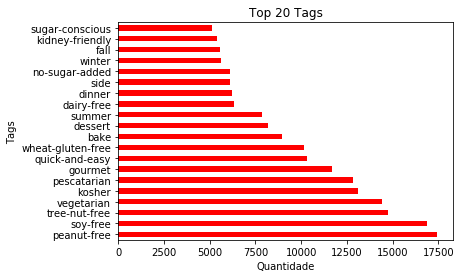

In [86]:
#Como são muitas categorias, vamos plotar o gráfico com as top 20
%matplotlib inline
df_receitas_site["category"].value_counts(ascending=False).head(20).plot.barh(color="r")
plt.title("Top 20 Tags")
plt.xlabel("Quantidade")
plt.ylabel("Tags")

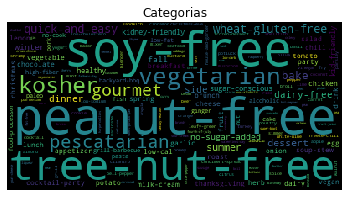

In [89]:
#Nuvem de palavras com as categorias
dict_word_calories = df_receitas_site["category"].value_counts().to_dict()
wordcloud = WordCloud().fit_words(dict_word_calories)
wordcloud
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Categorias")
plt.show()